In [1]:
from pylab import *
import stim
import sinter
import os
from typing import List
from scipy.optimize import curve_fit

from functions4 import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Corner vs Middle

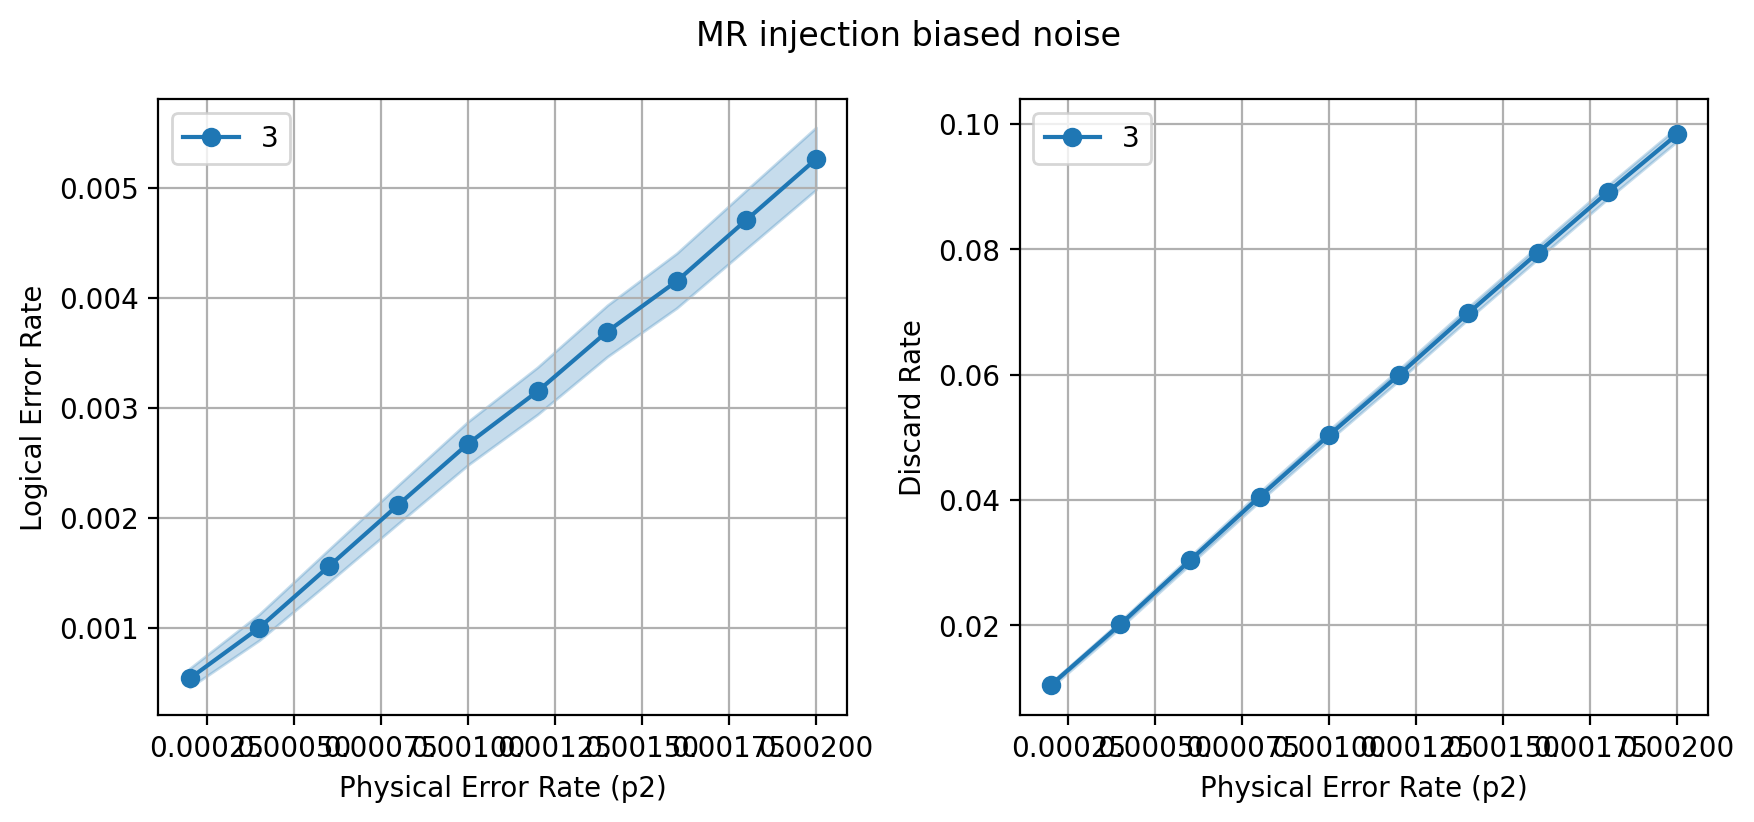

In [3]:
# circuit = write_grow_code(init_d=3, target_d=3, start='bell')
a = plot_LER_post_magic_fixed(circuit = mr_circuit_noise_str_upd_magic, errs=linspace(0.2,2,10)*1e-3, filename='stats.csv', noise_type='biased',
                             bit_packed_array_for_this_circ_dets = packbits(ones(24,dtype=np.uint8)))

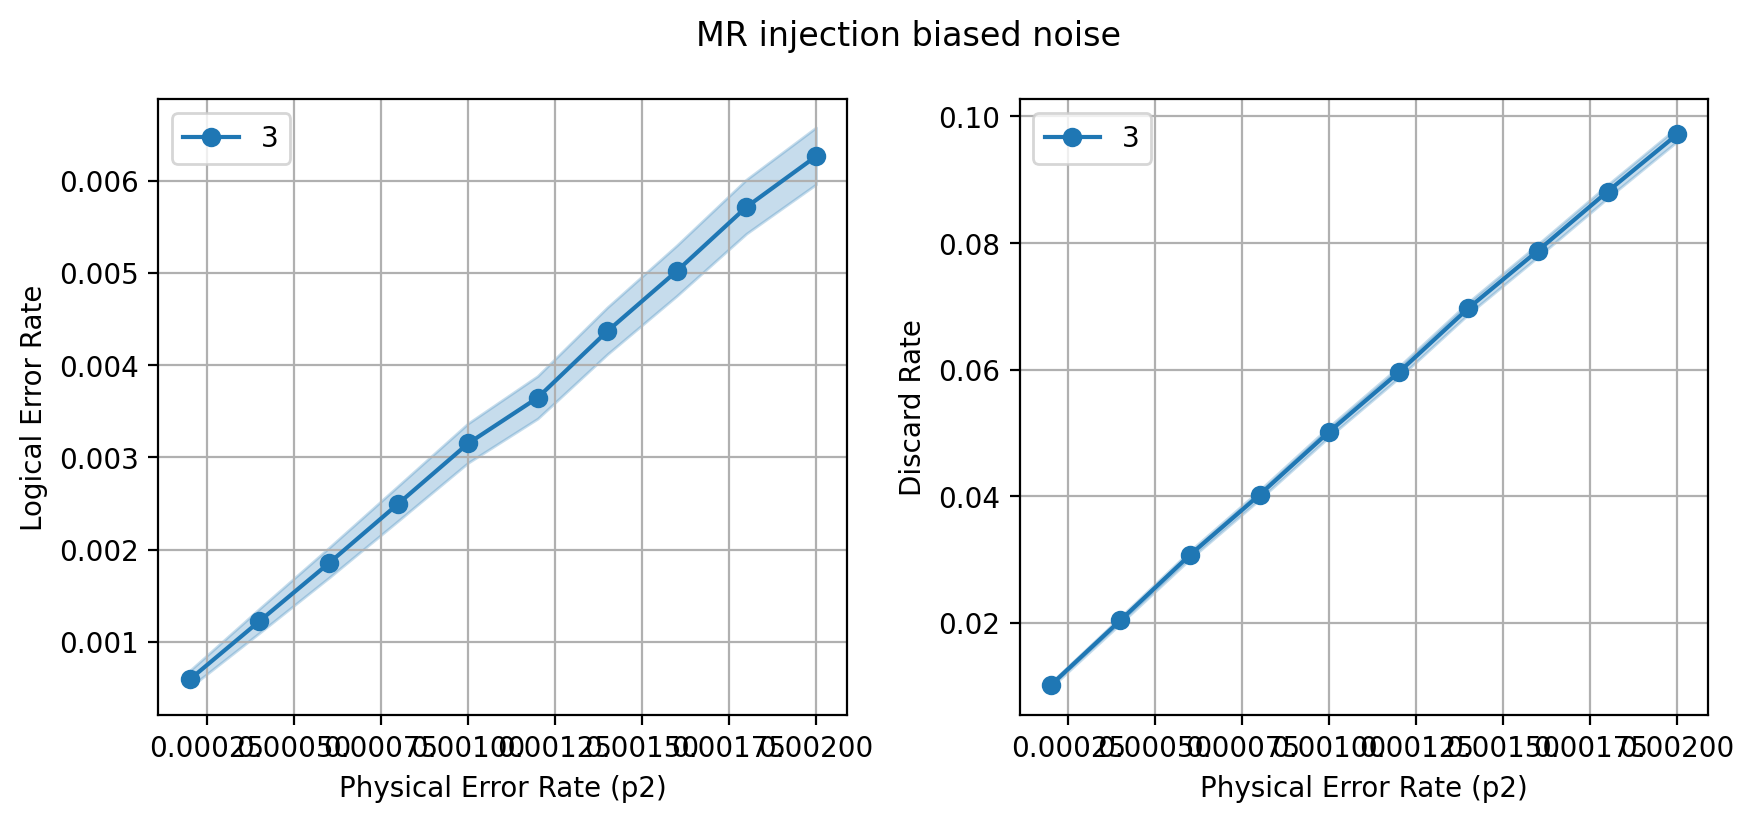

In [5]:
c = plot_LER_post_magic_fixed(circuit = cr_circuit_noise_str_upd_magic, errs=linspace(0.2,2,10)*1e-3, filename='stats.csv', noise_type='biased', 
                             bit_packed_array_for_this_circ_dets = packbits(ones(24,dtype=np.uint8)))

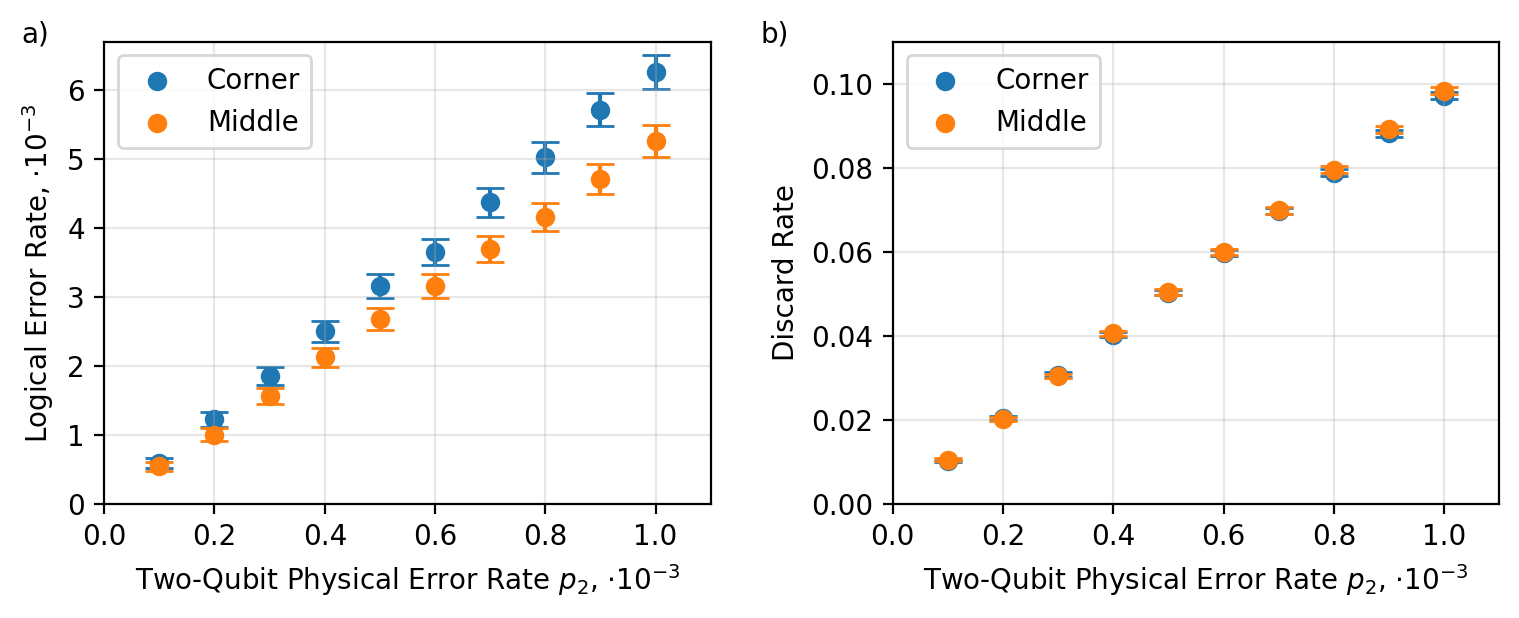

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(9,3))
plt.subplots_adjust(wspace=0.3)

ler = lambda a: a.errors/(a.shots-a.discards)
ler_err = lambda a: binom_error(a.errors, (a.shots-a.discards))
discs = lambda a: a.discards/a.shots
discs_err = lambda a: binom_error(a.discards, a.shots)
probs = lambda a: a.json_metadata['p']

ax[0].scatter(0.5e3*array(list(map(probs, c))), 1e3*(array(list(map(ler, c)))), label='Corner', zorder=0, color='C0')
ax[0].errorbar(0.5e3*array(list(map(probs, c))), 1e3*(array(list(map(ler, c)))), yerr=1e3*array(list(map(ler_err, c))), zorder=0, color='C0', fmt='none', capsize=5)
ax[0].scatter(0.5e3*array(list(map(probs, a))), 1e3*(array(list(map(ler, a)))), label='Middle', zorder=10, color='C1')
ax[0].errorbar(0.5e3*array(list(map(probs, a))), 1e3*(array(list(map(ler, a)))), yerr=1e3*array(list(map(ler_err, a))), zorder=10, color='C1', fmt='none', capsize=5)

ax[1].scatter(0.5e3*array(list(map(probs, c))), (array(list(map(discs, c)))), label='Corner', zorder=0, color='C0')
ax[1].errorbar(0.5e3*array(list(map(probs, c))), (array(list(map(discs, c)))), yerr=1*array(list(map(discs_err, c))), zorder=0, color='C0', fmt='none', capsize=5)
ax[1].scatter(0.5e3*array(list(map(probs, a))), (array(list(map(discs, a)))), label='Middle', zorder=10, color='C1')
ax[1].errorbar(0.5e3*array(list(map(probs, a))), (array(list(map(discs, a)))), yerr=1*array(list(map(discs_err, a))), zorder=10, color='C1', fmt='none', capsize=5)

# fig.suptitle('Injection biased noise', fontsize=12)
ax[0].set_xlabel("Two-Qubit Physical Error Rate $p_2$, $\\cdot$10$^{-3}$")
ax[0].set_ylabel("Logical Error Rate, $\\cdot$10$^{-3}$")
ax[0].grid(which='major', alpha=0.3)
ax[0].grid(which='minor')
ax[0].legend()
ax[1].set_xlabel("Two-Qubit Physical Error Rate $p_2$, $\\cdot$10$^{-3}$")
ax[1].set_ylabel("Discard Rate")
ax[1].grid(which='major', alpha=0.3)
ax[1].grid(which='minor')
ax[1].legend()
ax[1].set_ylim(0,0.11)
ax[0].set_xlim(0,1.1)
ax[0].set_ylim(0,6.7)
ax[1].set_xlim(0,1.1)
# ax[1].set_yticks([0,0.05,0.1,0.15,0.2])
fig.set_dpi(200)  # Show it bigger
ax[0].text(-0.15,6.7,'a)')
ax[1].text(-0.24,0.11,'b)')
show()
# fig.savefig('corner_middle_pap.png', transparent=True, dpi=600, bbox_inches='tight')
# fig.savefig('corner_middle_pap.pdf', transparent=True, dpi=600, bbox_inches='tight')

## Bell vs single

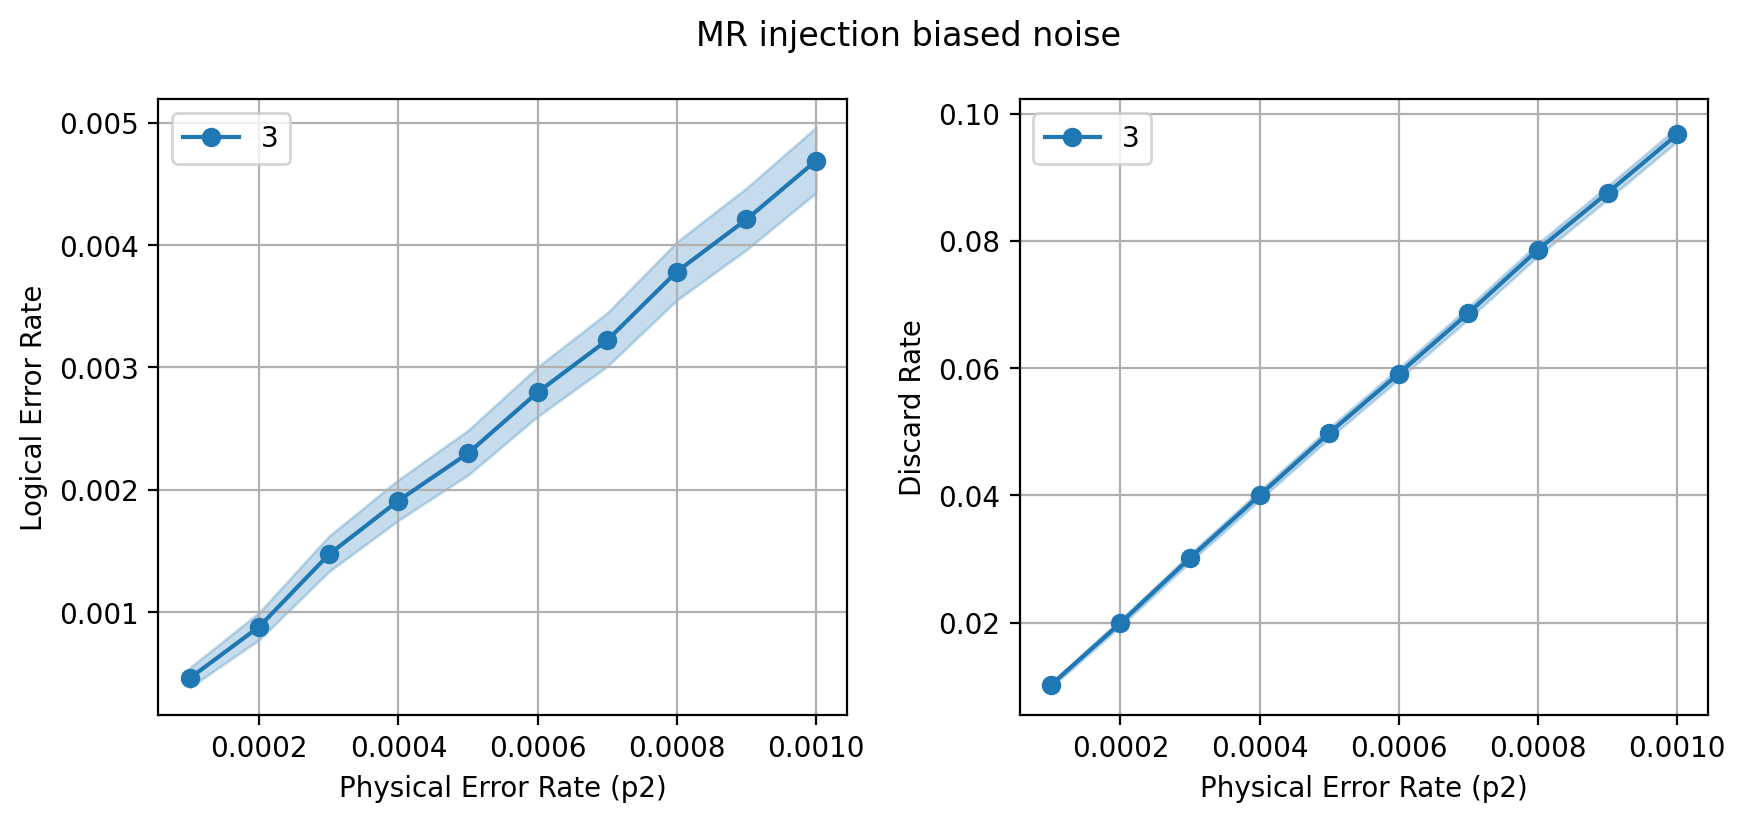

In [11]:
init_d = 3
shift_qubits = 100
shift_coord = 15
circuit = write_injection_bell_code(init_d=init_d, repeats=1, shift_coord=shift_coord, shift_qubits=shift_qubits)

bitmask_det = bitmask_for_postselection_bell(circuit, circuit)
bell = plot_LER_post_v2(circuit = circuit, dist=init_d, errs=linspace(0.1,1,10)*1e-3, filename='stats.csv', noise_type='biased',
                             bit_packed_array_for_this_circ_dets = bitmask_det)
show()

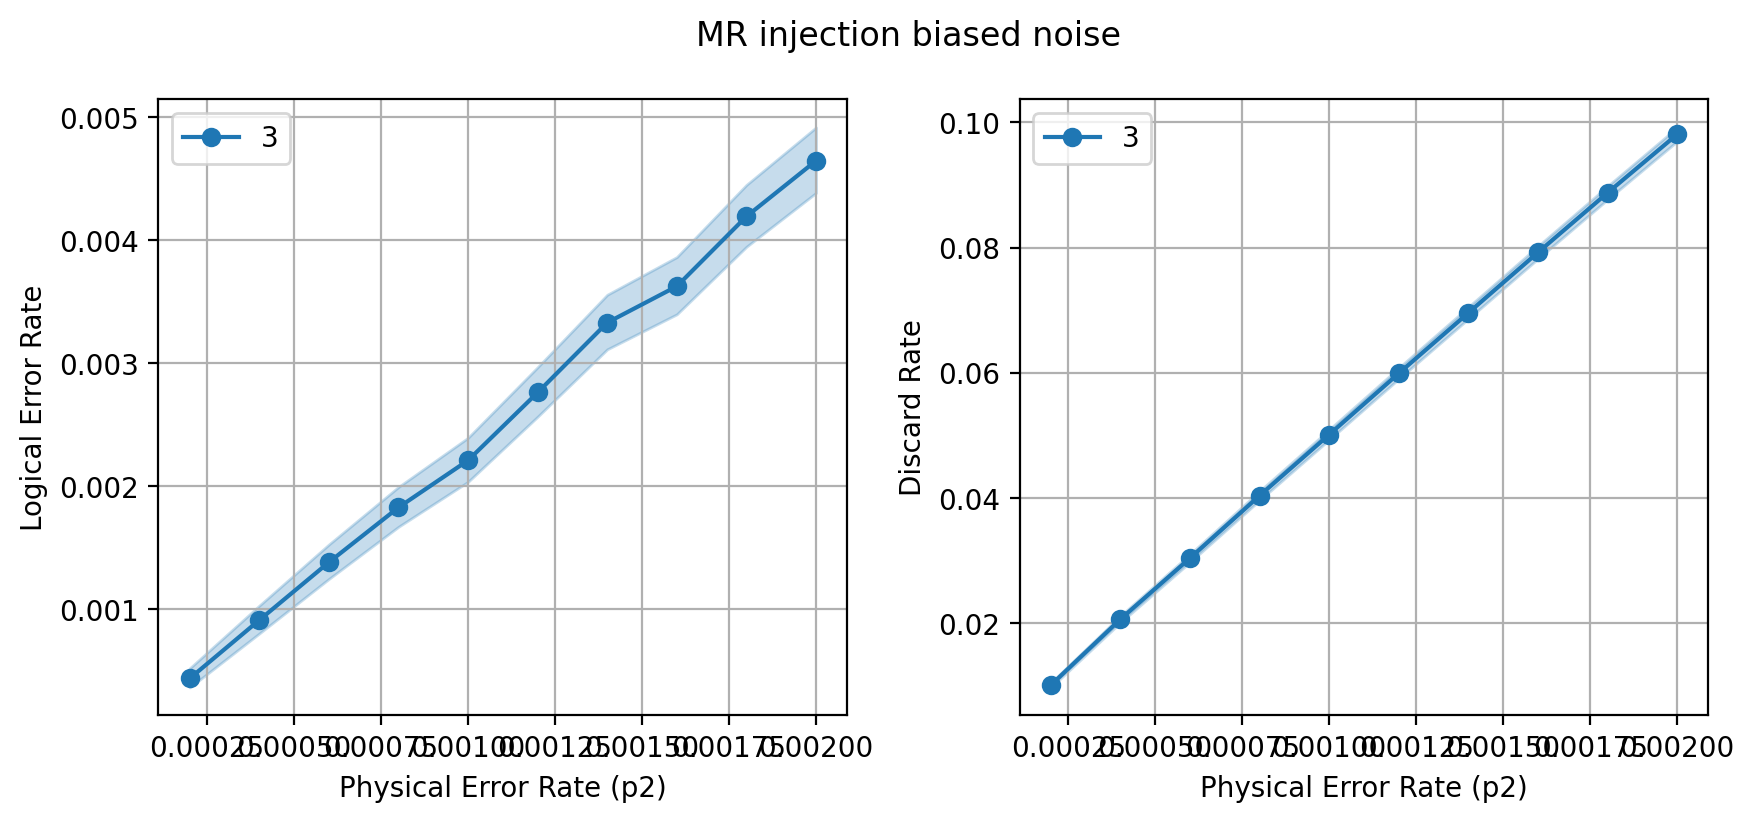

In [13]:
init_d = 3
circuit = write_injection_code(init_d, repeats=1)
bitmask_det = bitmask_for_postselection_circ(stim.Circuit(circuit), init_d=init_d)
nobell = plot_LER_post_v2(circuit = circuit, dist=init_d, errs=linspace(0.2,2,10)*1e-3, filename='stats.csv', noise_type='biased',
                             bit_packed_array_for_this_circ_dets = bitmask_det)
show()

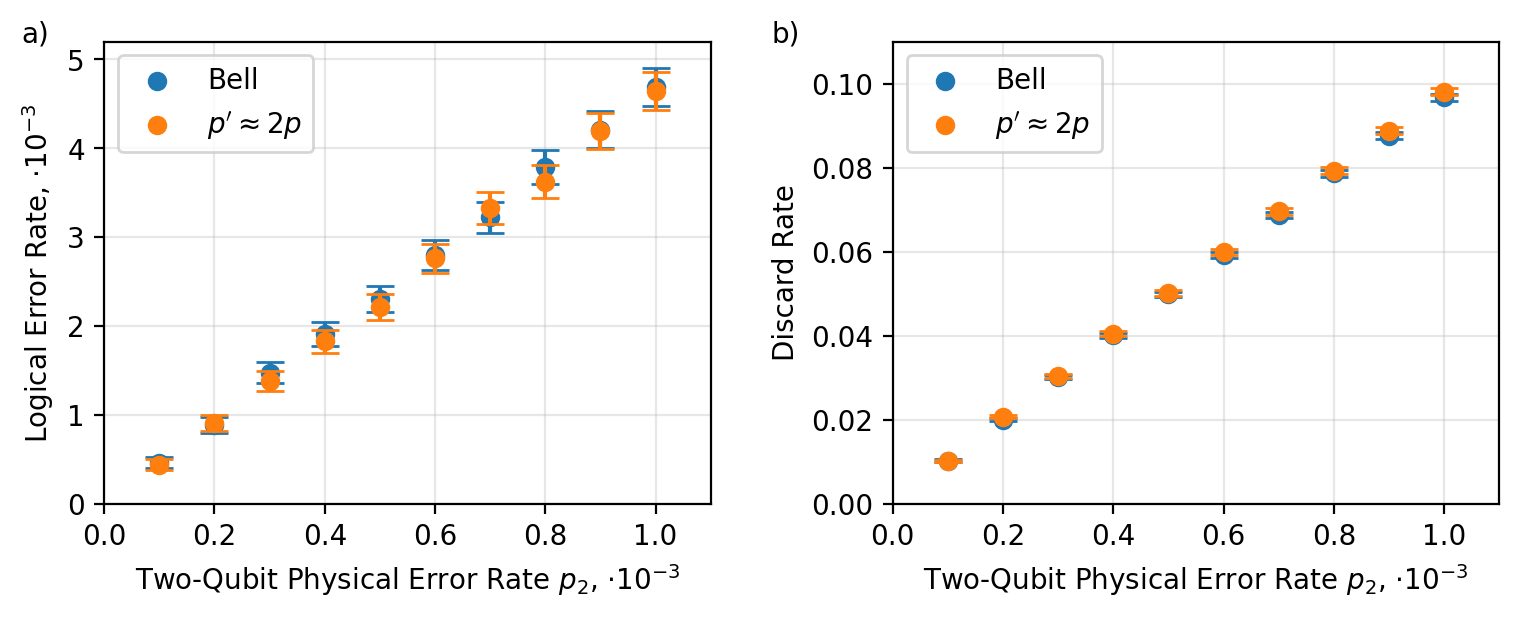

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(9,3))
# figsize=(9,3)
plt.subplots_adjust(wspace=0.3)

b = bell
d = nobell

ler = lambda a: a.errors/(a.shots-a.discards)
ler_err = lambda a: binom_error(a.errors, (a.shots-a.discards))
discs = lambda a: a.discards/a.shots
discs_err = lambda a: binom_error(a.discards, a.shots)
probs = lambda a: a.json_metadata['p']

ax[0].scatter(1e3*array(list(map(probs, b))), 1e3*array(list(map(ler, b))), label='Bell', zorder=10, color='C0')
ax[0].errorbar(1e3*array(list(map(probs, b))), 1e3*array(list(map(ler, b))), yerr=1e3*array(list(map(ler_err, b))), zorder=10, color='C0', fmt='none', capsize=5)
ax[0].scatter(0.5e3*array(list(map(probs, d))), 1e3*(array(list(map(ler, d)))), label='$p^{\\prime} \\approx 2p$', zorder=10, color='C1')
ax[0].errorbar(0.5e3*array(list(map(probs, d))), 1e3*(array(list(map(ler, d)))), yerr=1e3*array(list(map(ler_err, d))), zorder=10, color='C1', fmt='none', capsize=5)

ax[1].scatter(1e3*array(list(map(probs, b))), array(list(map(discs, b))), label='Bell', zorder=10, color='C0')
ax[1].errorbar(1e3*array(list(map(probs, b))), array(list(map(discs, b))), yerr=array(list(map(discs_err, b))), zorder=10, color='C0', fmt='none', capsize=5)
ax[1].scatter(0.5e3*array(list(map(probs, d))), (array(list(map(discs, d)))), label='$p^{\\prime} \\approx 2p$', zorder=10, color='C1')
ax[1].errorbar(0.5e3*array(list(map(probs, d))), (array(list(map(discs, d)))), yerr=1*array(list(map(discs_err, d))), zorder=10, color='C1', fmt='none', capsize=5)

# fig.suptitle('Injection biased noise', fontsize=12)
ax[0].set_xlabel("Two-Qubit Physical Error Rate $p_2$, $\\cdot$10$^{-3}$")
ax[0].set_ylabel("Logical Error Rate, $\\cdot$10$^{-3}$")
ax[0].grid(which='major', alpha=0.3)
ax[0].grid(which='minor')
ax[0].legend()
ax[1].set_xlabel("Two-Qubit Physical Error Rate $p_2$, $\\cdot$10$^{-3}$")
ax[1].set_ylabel("Discard Rate")
ax[1].grid(which='major', alpha=0.3)
ax[1].grid(which='minor')
ax[1].legend()
ax[1].set_ylim(0,0.11)
ax[0].set_xlim(0,1.1)
ax[0].set_ylim(0,5.2)
ax[1].set_xlim(0,1.1)
ax[0].text(-0.15,5.2,'a)')
ax[1].text(-0.22,0.11,'b)')
fig.set_dpi(200)  # Show it bigger
show()
# fig.savefig('bell_single_pap.png', transparent=True, dpi=600, bbox_inches='tight')
# fig.savefig('bell_single_pap.pdf', transparent=True, dpi=600, bbox_inches='tight')

---

## Injection in different d

In [17]:
inj = []

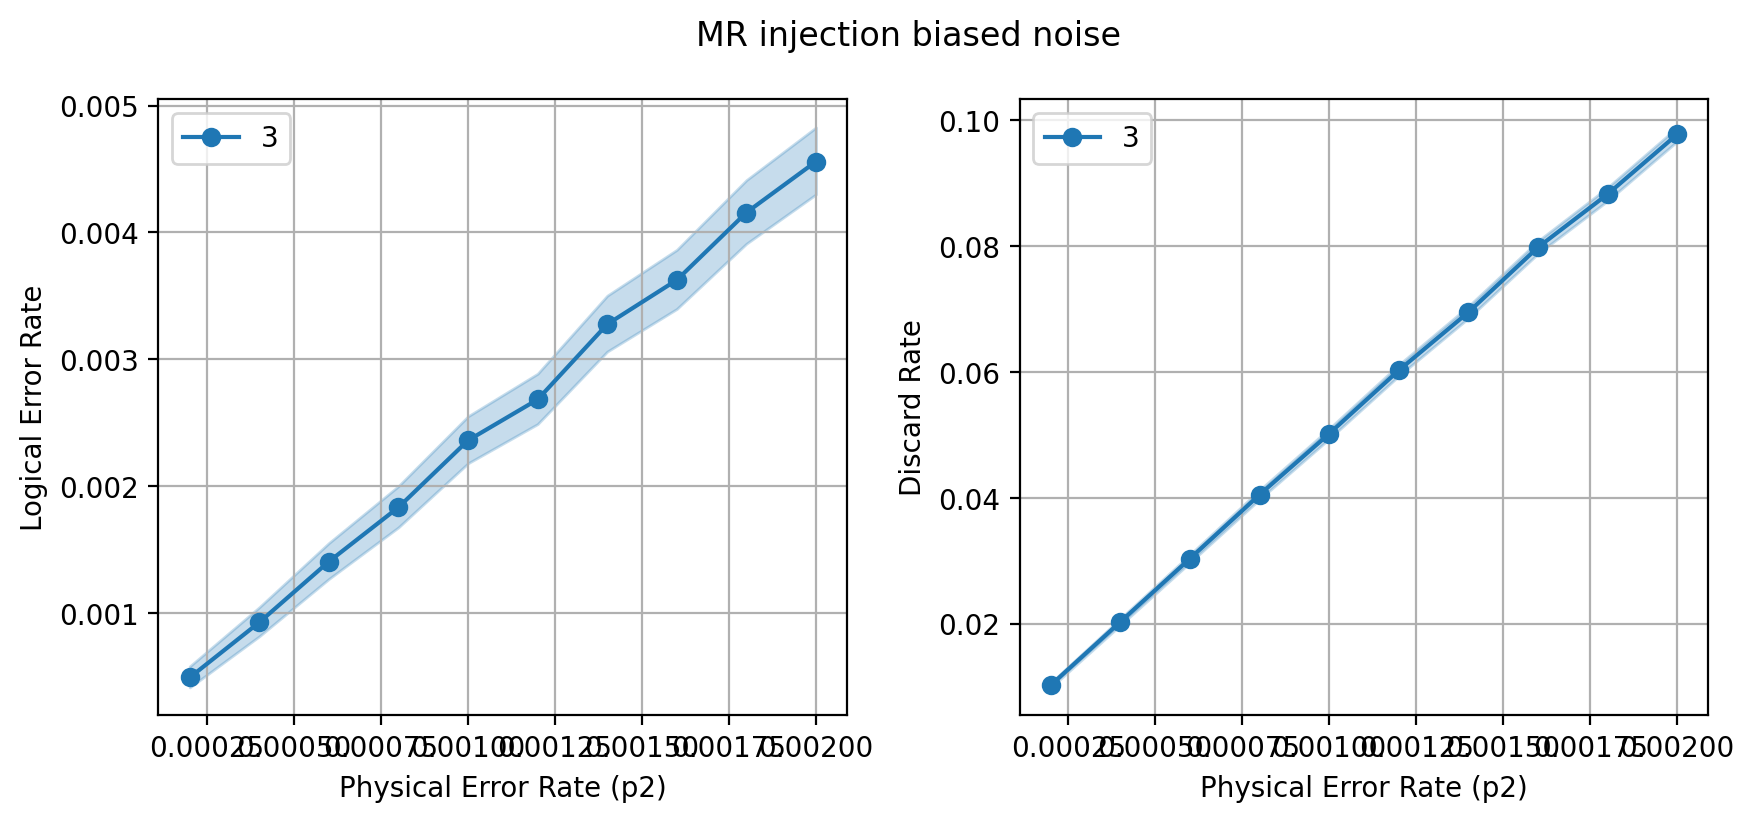

In [19]:
init_d = 3
circuit = write_injection_code(init_d, repeats=1)
bitmask_det = bitmask_for_postselection_circ(stim.Circuit(circuit), init_d=init_d)
inj.append(plot_LER_post_v2(circuit = circuit, dist=init_d, errs=linspace(0.2,2,10)*1e-3, filename='stats.csv', noise_type='biased',
                             bit_packed_array_for_this_circ_dets = bitmask_det))
show()

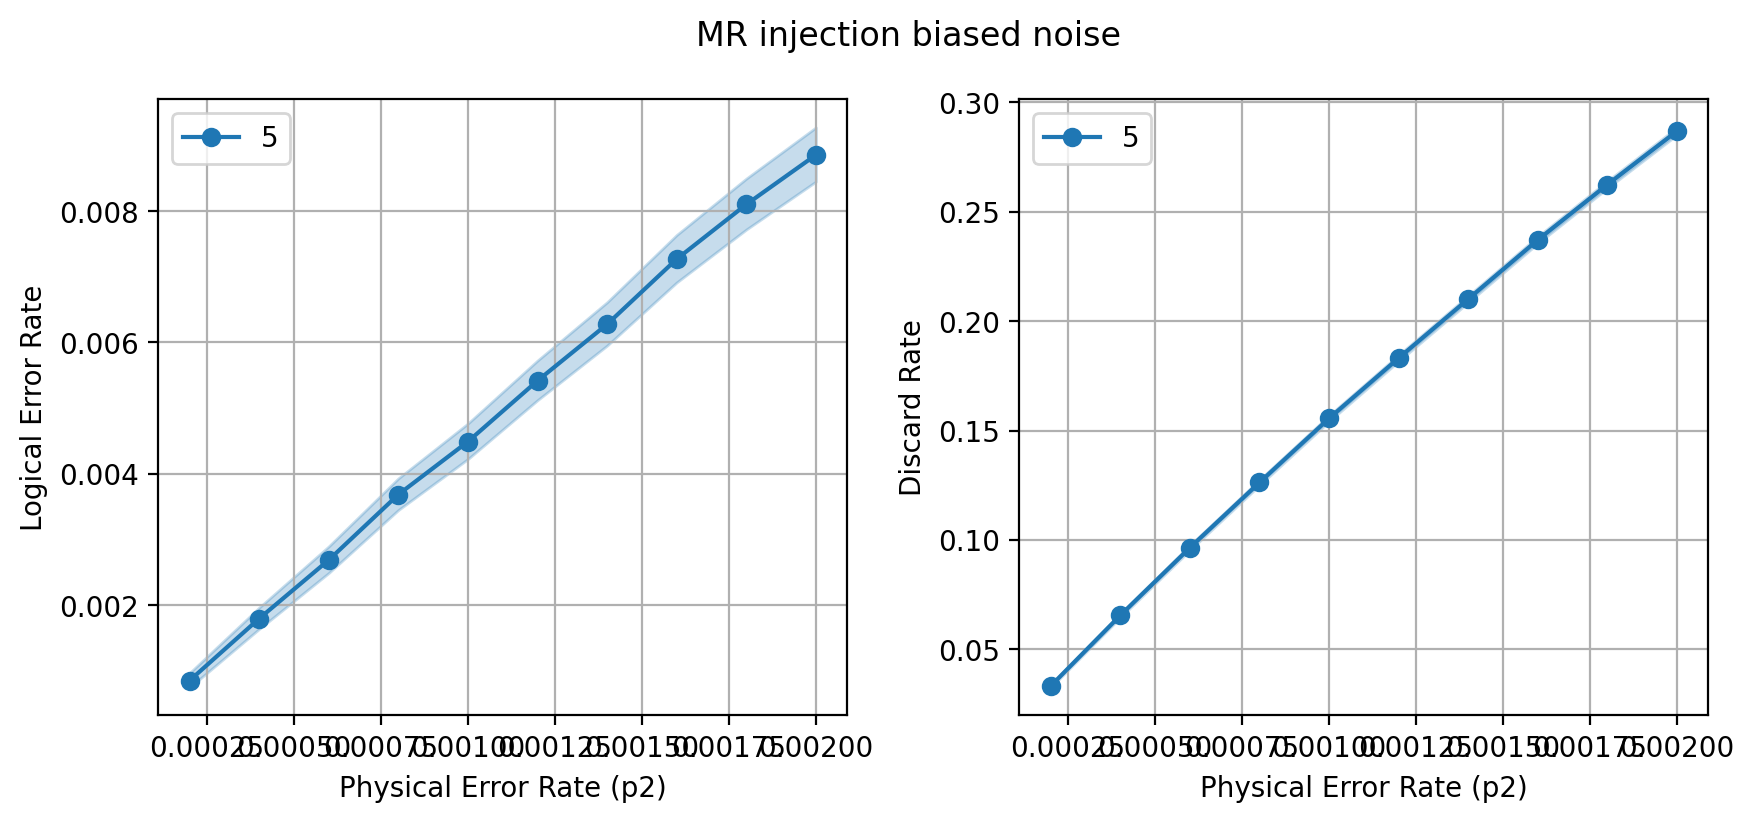

In [21]:
init_d = 5
circuit = write_injection_code(init_d, repeats=1)
bitmask_det = bitmask_for_postselection_circ(stim.Circuit(circuit), init_d=init_d)
inj.append(plot_LER_post_v2(circuit = circuit, dist=init_d, errs=linspace(0.2,2,10)*1e-3, filename='stats.csv', noise_type='biased',
                             bit_packed_array_for_this_circ_dets = bitmask_det))
show()

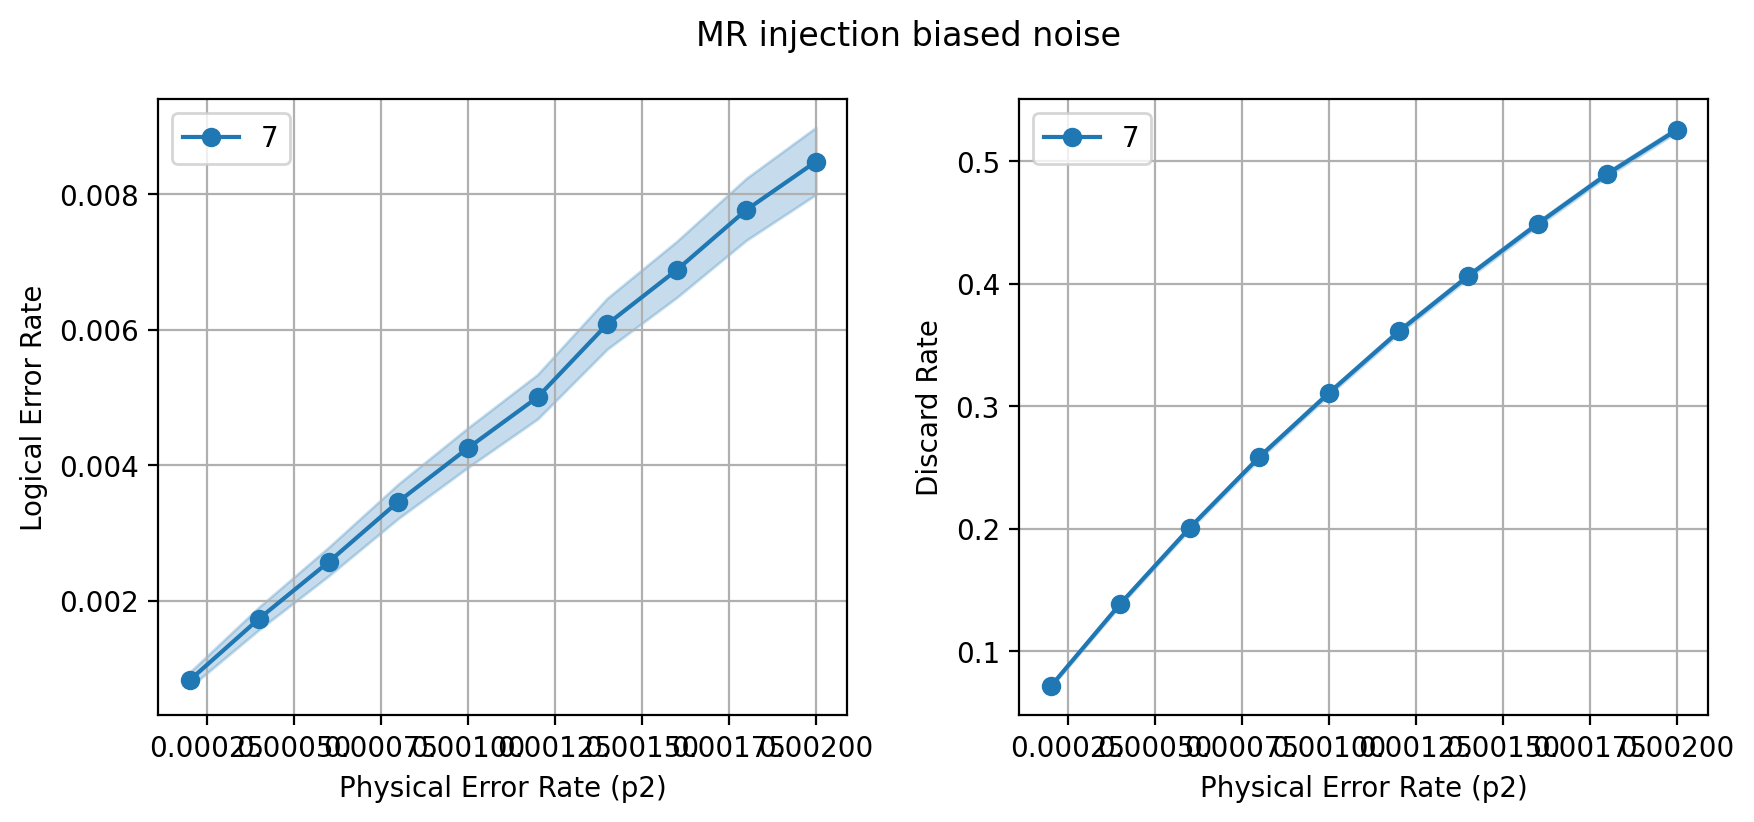

In [23]:
init_d = 7
circuit = write_injection_code(init_d, repeats=1)
bitmask_det = bitmask_for_postselection_circ(stim.Circuit(circuit), init_d=init_d)
inj.append(plot_LER_post_v2(circuit = circuit, dist=init_d, errs=linspace(0.2,2,10)*1e-3, filename='stats.csv', noise_type='biased',
                             bit_packed_array_for_this_circ_dets = bitmask_det))
show()

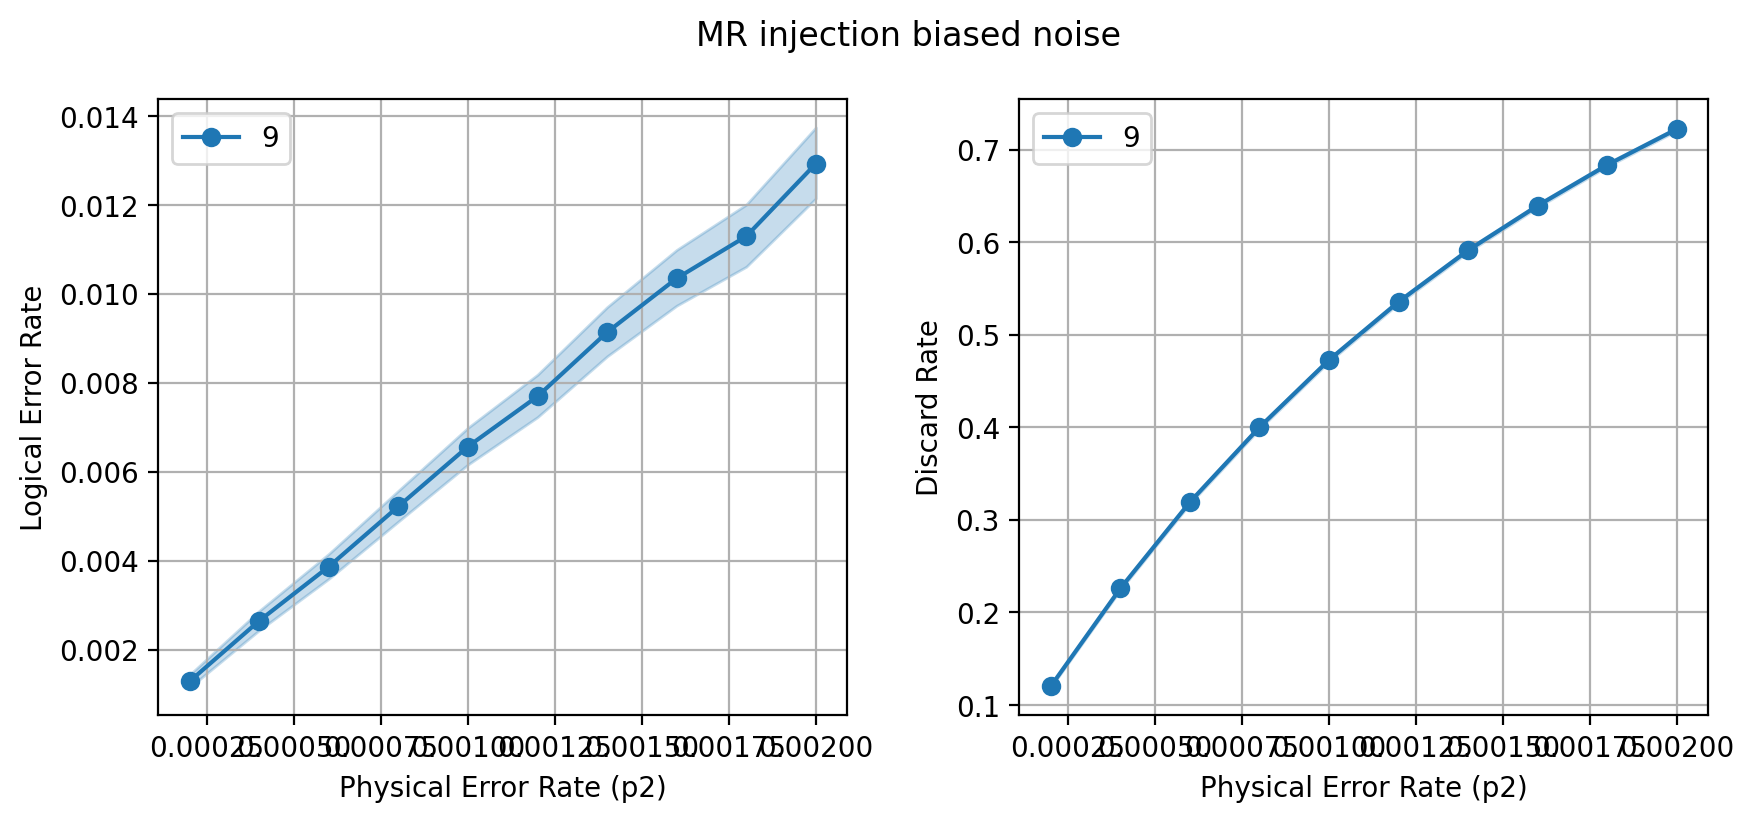

In [24]:
init_d = 9
circuit = write_injection_code(init_d, repeats=1)
bitmask_det = bitmask_for_postselection_circ(stim.Circuit(circuit), init_d=init_d)
inj.append(plot_LER_post_v2(circuit = circuit, dist=init_d, errs=linspace(0.2,2,10)*1e-3, filename='stats.csv', noise_type='biased',
                             bit_packed_array_for_this_circ_dets = bitmask_det))
show()

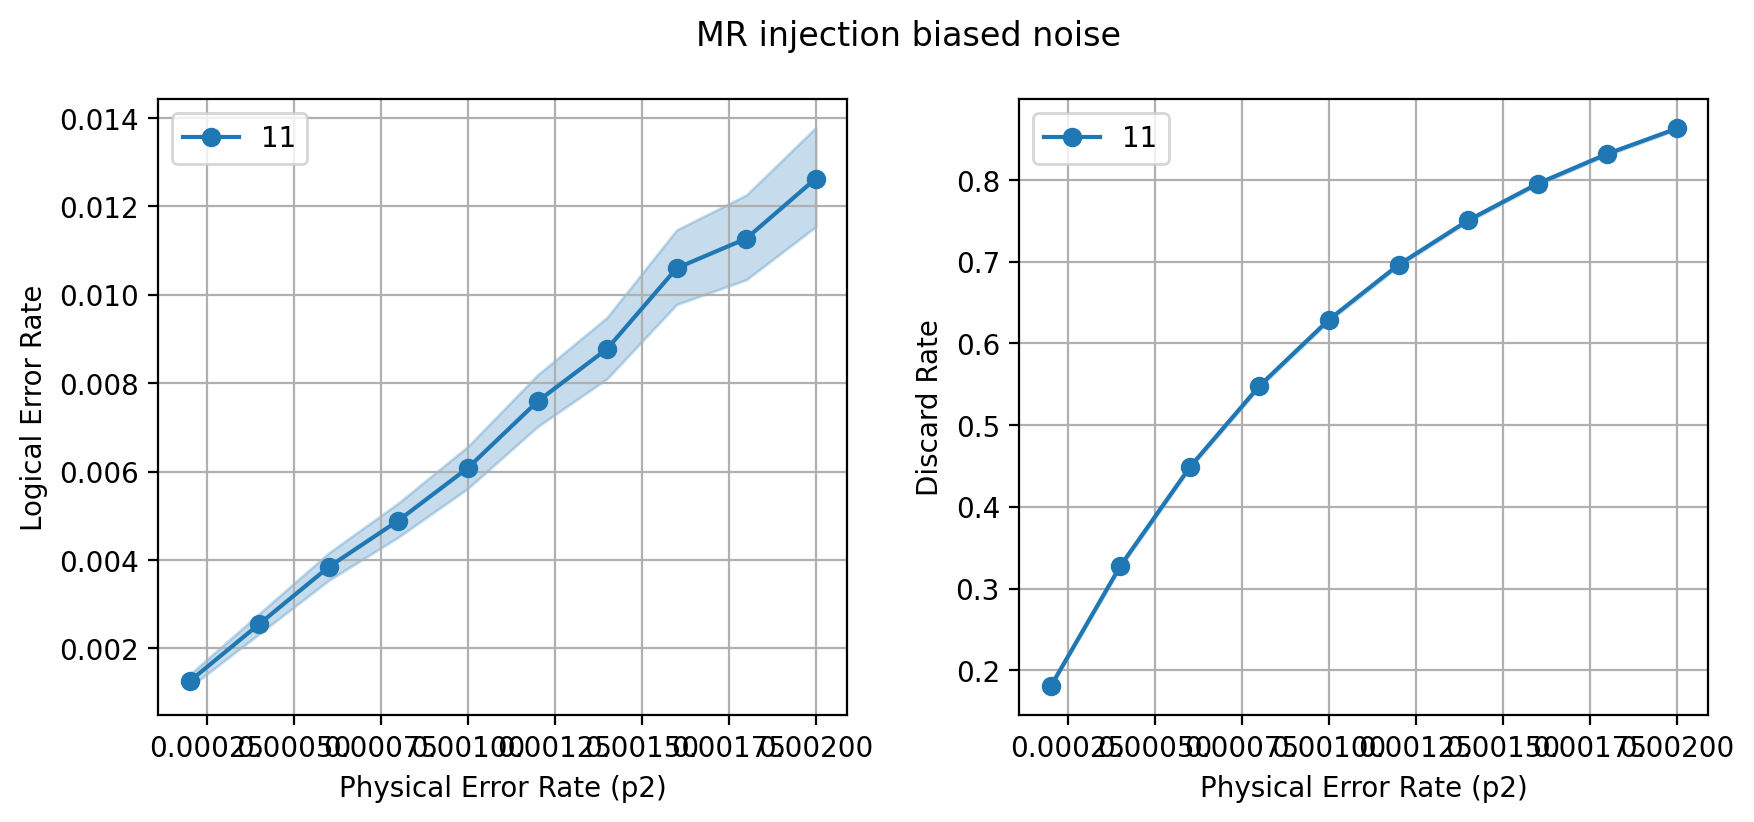

In [25]:
init_d = 11
circuit = write_injection_code(init_d, repeats=1)
bitmask_det = bitmask_for_postselection_circ(stim.Circuit(circuit), init_d=init_d)
inj.append(plot_LER_post_v2(circuit = circuit, dist=init_d, errs=linspace(0.2,2,10)*1e-3, filename='stats11.csv', noise_type='biased',
                             bit_packed_array_for_this_circ_dets = bitmask_det))
show()

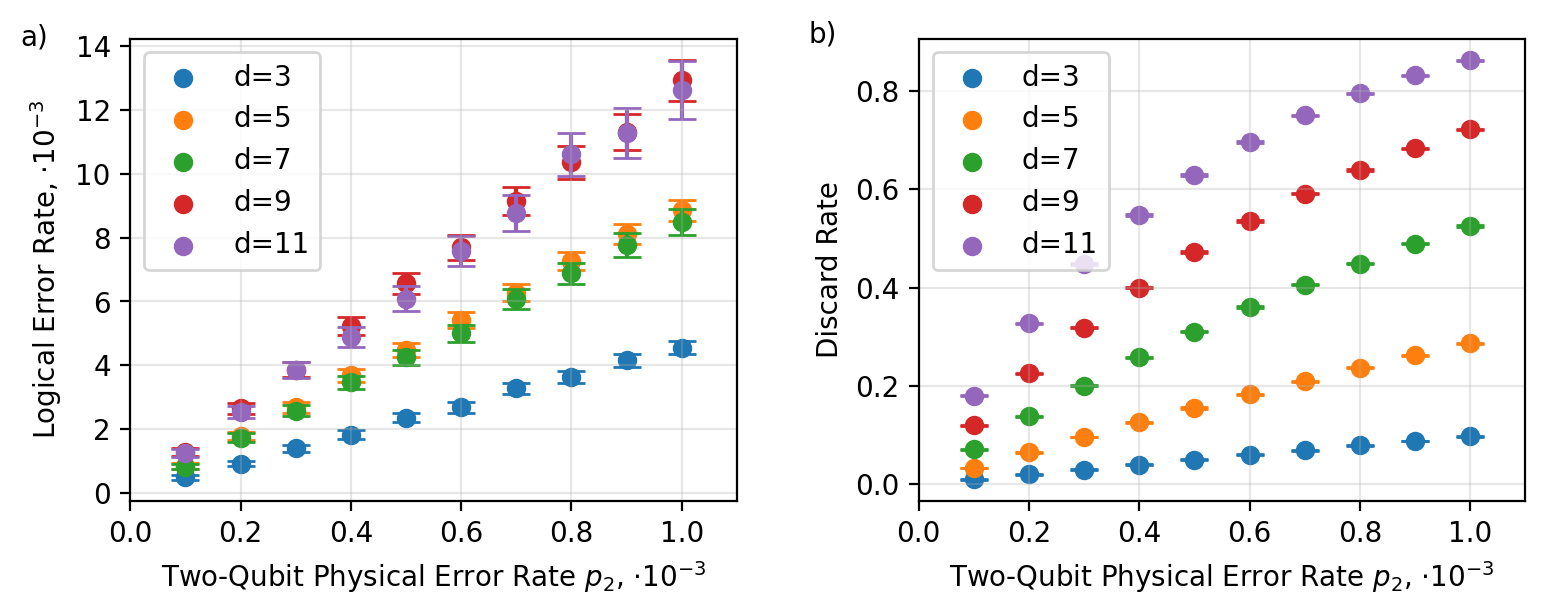

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(9,3))
plt.subplots_adjust(wspace=0.3)

ler = lambda a: a.errors/(a.shots-a.discards)
ler_err = lambda a: binom_error(a.errors, (a.shots-a.discards))
discs = lambda a: a.discards/a.shots
discs_err = lambda a: binom_error(a.discards, a.shots)
probs = lambda a: a.json_metadata['p']
# len(inj)
dmax = 5
for i in range(dmax):
    b = inj[i]
    ax[0].scatter(0.5e3*array(list(map(probs, b))), 1e3*(array(list(map(ler, b)))), label=f'd={i*2+3}', zorder=1, color=f'C{i}')
    ax[0].errorbar(0.5e3*array(list(map(probs, b))), 1e3*(array(list(map(ler, b)))), yerr=1e3*array(list(map(ler_err, b))), zorder=1, color=f'C{i}', fmt='none', capsize=5)
    
    ax[1].scatter(0.5e3*array(list(map(probs, b))), (array(list(map(discs, b)))), label=f'd={i*2+3}', zorder=1, color=f'C{i}')
    ax[1].errorbar(0.5e3*array(list(map(probs, b))), (array(list(map(discs, b)))), yerr=1*array(list(map(discs_err, b))), zorder=1, color=f'C{i}', fmt='none', capsize=5)

# fig.suptitle('Injection biased noise', fontsize=12)
ax[0].set_xlabel("Two-Qubit Physical Error Rate $p_2$, $\\cdot$10$^{-3}$")
ax[0].set_ylabel("Logical Error Rate, $\\cdot$10$^{-3}$")
ax[0].grid(which='major', alpha=0.3)
ax[0].grid(which='minor')
# ax[0].set_ylim(0, 10)
ax[0].legend(loc='upper left')
ax[1].set_xlabel("Two-Qubit Physical Error Rate $p_2$, $\\cdot$10$^{-3}$")
ax[1].set_ylabel("Discard Rate")
ax[1].grid(which='major', alpha=0.3)
ax[1].grid(which='minor')
ax[1].legend(loc='upper left')
# ax[1].set_ylim(-0.01, 0.7)
fig.set_dpi(200)  # Show it bigger
# ax[1].set_ylim(0,0.11)
ax[0].set_xlim(0,1.1)
# ax[0].set_ylim(0,6.2)
ax[1].set_xlim(0,1.1)
ax[0].text(-0.2,14,'a)')
ax[1].text(-0.2,0.9,'b)')
show()
# fig.savefig(f'injection_d_pap.png', transparent=True, dpi=600, bbox_inches='tight')
# fig.savefig(f'injection_d_pap.pdf', transparent=True, dpi=600, bbox_inches='tight')

## LER-DR trade-off plotting

In [47]:
## since LER-DR trade-off calulation takes ~ 30 min of calculation, one can just load the results from the pickle file
import pickle
with open('growing_list.pkl', 'rb') as file:
    growing = pickle.load(file)

In [49]:
data_ler = zeros((10,6))
data_ler_err = zeros((10,6))
data_dr = zeros((10,6))
data_dr_err = zeros((10,6))

b = growing[0]
phys_err = array(list(map(probs, b)))
x_data = np.array([3,7,11,15,19,23])

for i in range(6):
    b = growing[i]
    for j in range(10):
        data_ler[j,i] = array(list(map(ler, b)))[j]
        data_ler_err[j,i] = array(list(map(ler_err, b)))[j]
        data_dr[j,i] = array(list(map(discs, b)))[j]
        data_dr_err[j,i] = array(list(map(discs_err, b)))[j]

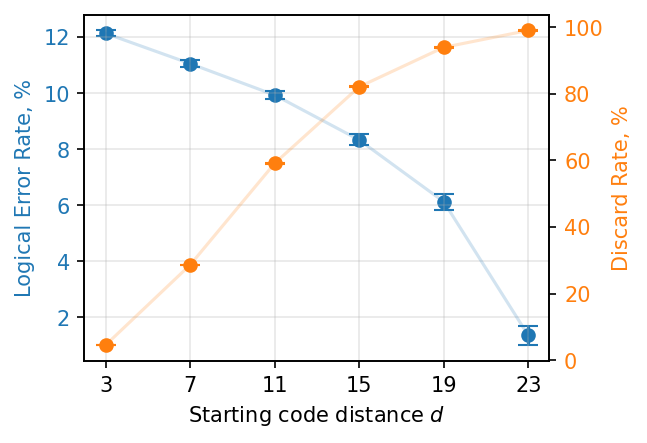

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(4,3))
# plt.subplots_adjust(wspace=0.25)

i=-1
ax.scatter(x_data, 1e2*data_ler[i], label='$p_2$=0.1%', zorder=1, color=f'C0')
ax.plot(x_data, 1e2*data_ler[i], '-', alpha=0.2, color=f'C0')
ax.errorbar(x_data, 1e2*data_ler[i], yerr=1e2*data_ler_err[i], zorder=1, color=f'C0', fmt='none', capsize=5)
ax2 = ax.twinx()
ax2.scatter(x_data, 1e2*data_dr[i], zorder=1, color='C1')
ax2.plot(x_data, 1e2*data_dr[i], '-', alpha=0.2, color='C1')
ax2.errorbar(x_data, 1e2*data_dr[i], yerr=1e2*data_dr_err[i], zorder=1, color='C1', fmt='none', capsize=5)

# ax2.plot(x, y2, color='C1', label='x^2')
ax2.set_ylabel('Discard Rate, %', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')
    
# fig.suptitle('Injection biased noise', fontsize=12)
ax.set_xlabel("Starting code distance $d$")
ax.set_ylabel("Logical Error Rate, %", color='C0')
ax.tick_params(axis='y', labelcolor='C0')
ax.grid(which='major', alpha=0.3)
ax.grid(which='minor')
# ax[0].set_ylim(0, 4.2)
# ax.legend(loc='upper center')
ax.set_xticks(x_data)

fig.set_dpi(150)  # Show it bigger
show()
# fig.savefig(f'Final_trade_off_pap2.png', transparent=True, dpi=600, bbox_inches='tight')
# fig.savefig(f'Final_trade_off_pap2.pdf', transparent=True, dpi=600, bbox_inches='tight')

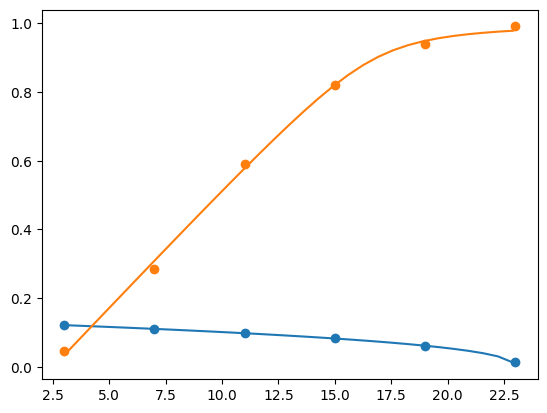

(array([14.19068006,  0.05035631,  2.49449757]),
 array([0.77725904, 0.02882006, 0.25802737]))

In [53]:
# fit
def discard_func1(x,a,k,x0):
    x1 = (x-x0)/a
    return 1/2*(sqrt(k+(x1+1)**2)-sqrt(k+(x1-1)**2))
    
def ler_func(x,a,r):
    return (23-x)**(r)*a

popt1, pcov1 = curve_fit(discard_func1, x_data, data_dr[-1], p0=[15,0.02,3])
popt2, pcov2 = curve_fit(ler_func, x_data, data_ler[-1], p0=[3.65e-2,0.4])

x = linspace(3,22.9,31)

i = -1
scatter(x_data, data_ler[i], color='C0')
plot(x, ler_func(x, *popt2), color='C0')
scatter(x_data, data_dr[i], color='C1')
plot(x, discard_func1(x, *popt1), color='C1')
show()
popt1, sqrt(diag(pcov1))

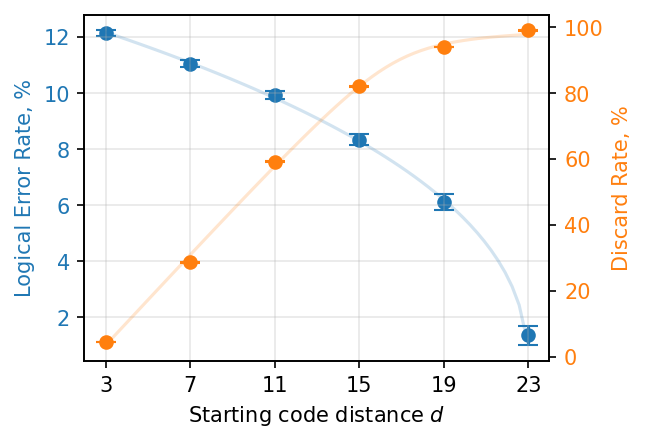

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(4,3))
# plt.subplots_adjust(wspace=0.25)
x = linspace(3,22.9,61)

i=-1
ax.scatter(x_data, 1e2*data_ler[i], label='$p_2$=0.1%', zorder=1, color=f'C0')
ax.plot(x, 1e2*ler_func(x, *popt2), '-', alpha=0.2, color=f'C0')
ax.errorbar(x_data, 1e2*data_ler[i], yerr=1e2*data_ler_err[i], zorder=1, color=f'C0', fmt='none', capsize=5)
ax2 = ax.twinx()
ax2.scatter(x_data, 1e2*data_dr[i], zorder=1, color='C1')
ax2.plot(x, 1e2*discard_func1(x, *popt1), '-', alpha=0.2, color='C1')
ax2.errorbar(x_data, 1e2*data_dr[i], yerr=1e2*data_dr_err[i], zorder=1, color='C1', fmt='none', capsize=5)

# ax2.plot(x, y2, color='C1', label='x^2')
ax2.set_ylabel('Discard Rate, %', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')
    
# fig.suptitle('Injection biased noise', fontsize=12)
ax.set_xlabel("Starting code distance $d$")
ax.set_ylabel("Logical Error Rate, %", color='C0')
ax.tick_params(axis='y', labelcolor='C0')
ax.grid(which='major', alpha=0.3)
ax.grid(which='minor')
# ax[0].set_ylim(0, 4.2)
# ax.legend(loc='upper center')
ax.set_xticks(x_data)
# ax.set_yscale('log')
# ax2.set_yscale('log')

fig.set_dpi(150)  # Show it bigger
show()
# fig.savefig(f'Final_trade_off_pap_fit2.png', transparent=True, dpi=600, bbox_inches='tight')
# fig.savefig(f'Final_trade_off_pap_fit2.pdf', transparent=True, dpi=600, bbox_inches='tight')

In [57]:
popt1, sqrt(diag(pcov1))

(array([14.19068006,  0.05035631,  2.49449757]),
 array([0.77725904, 0.02882006, 0.25802737]))

In [59]:
popt2, sqrt(diag(pcov2))

(array([0.03463121, 0.4196862 ]), array([0.00604832, 0.06683397]))

## LER DR trade-off calculation

In [122]:
## since this step takes ~ 30 min of calculation, one can just load the results from the pickle file (above)
growing = []

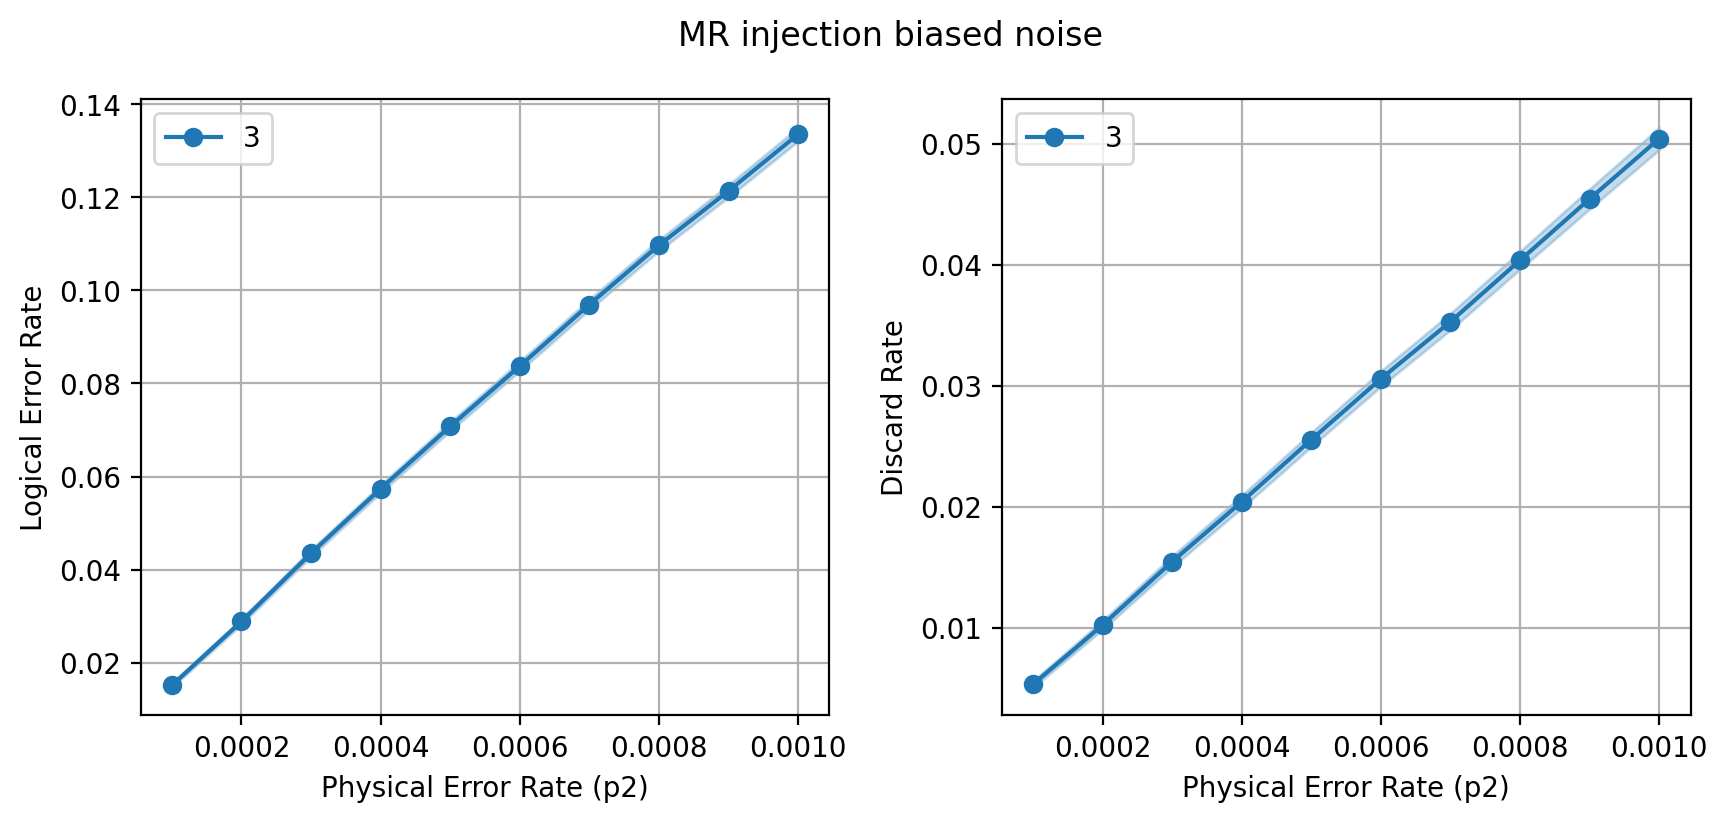

In [124]:
init_d = 3
target_d = 23
circuit = write_inject_grow_code(init_d=init_d, target_d=target_d, start='bell')
bitmask_det = bitmask_for_postselection_circ(stim.Circuit(circuit), init_d=init_d)
growing.append(plot_LER_post_v2(circuit = circuit, dist=init_d, errs=linspace(0.1,1,10)*1e-3, filename='stats.csv', noise_type='biased',
                             bit_packed_array_for_this_circ_dets = bitmask_det))

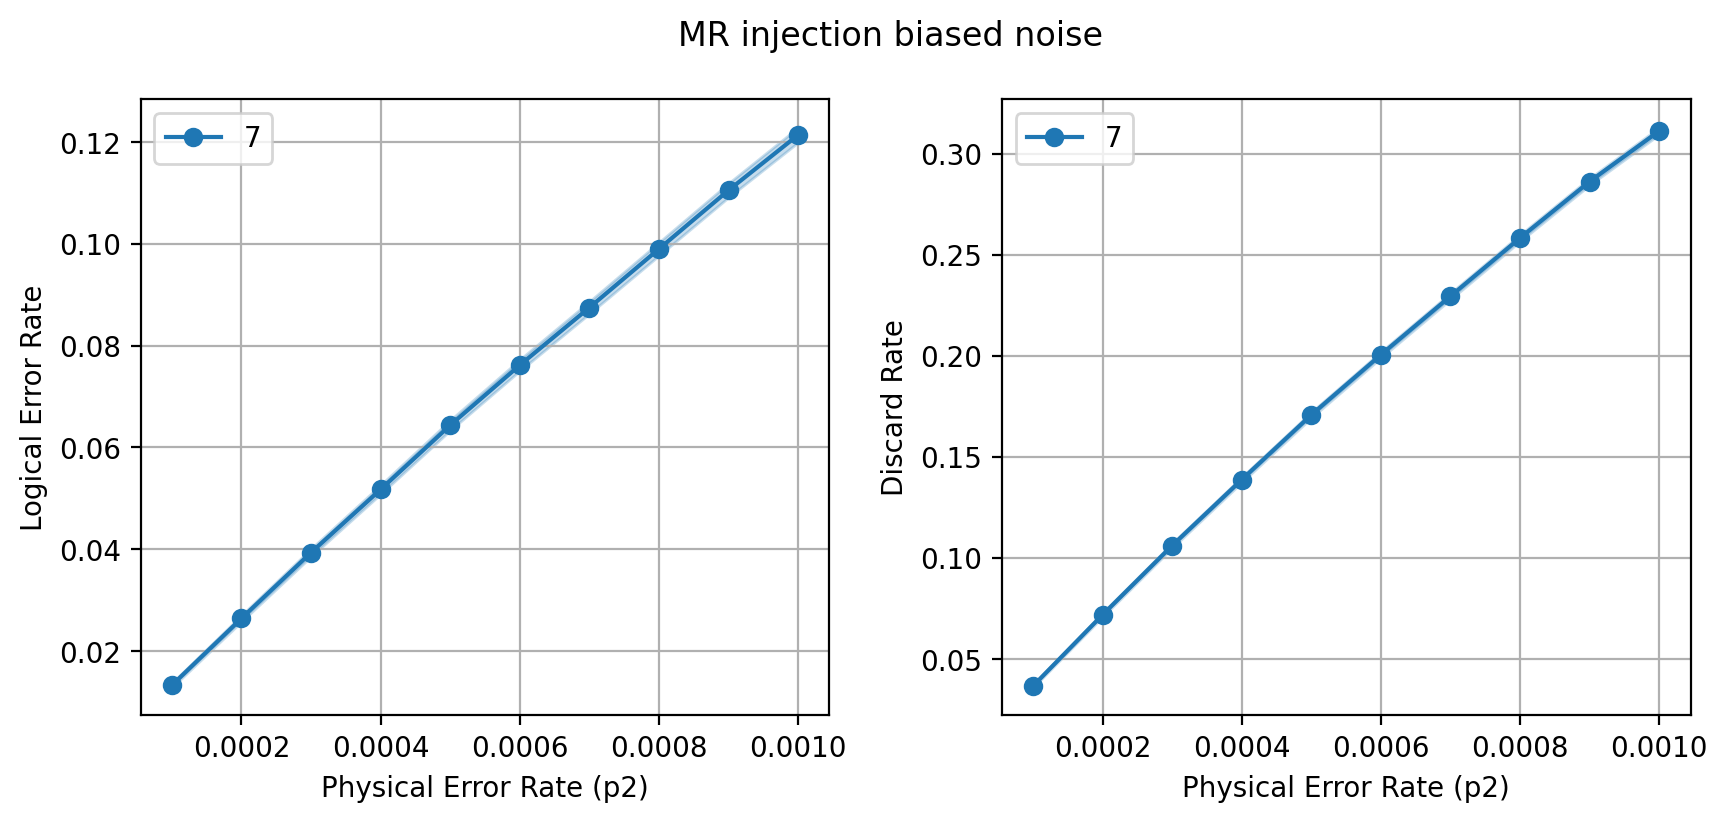

In [126]:
init_d = 7
target_d = 23
circuit = write_inject_grow_code(init_d=init_d, target_d=target_d, start='bell')
bitmask_det = bitmask_for_postselection_circ(stim.Circuit(circuit), init_d=init_d)
growing.append(plot_LER_post_v2(circuit = circuit, dist=init_d, errs=linspace(0.1,1,10)*1e-3, filename='stats.csv', noise_type='biased',
                             bit_packed_array_for_this_circ_dets = bitmask_det))

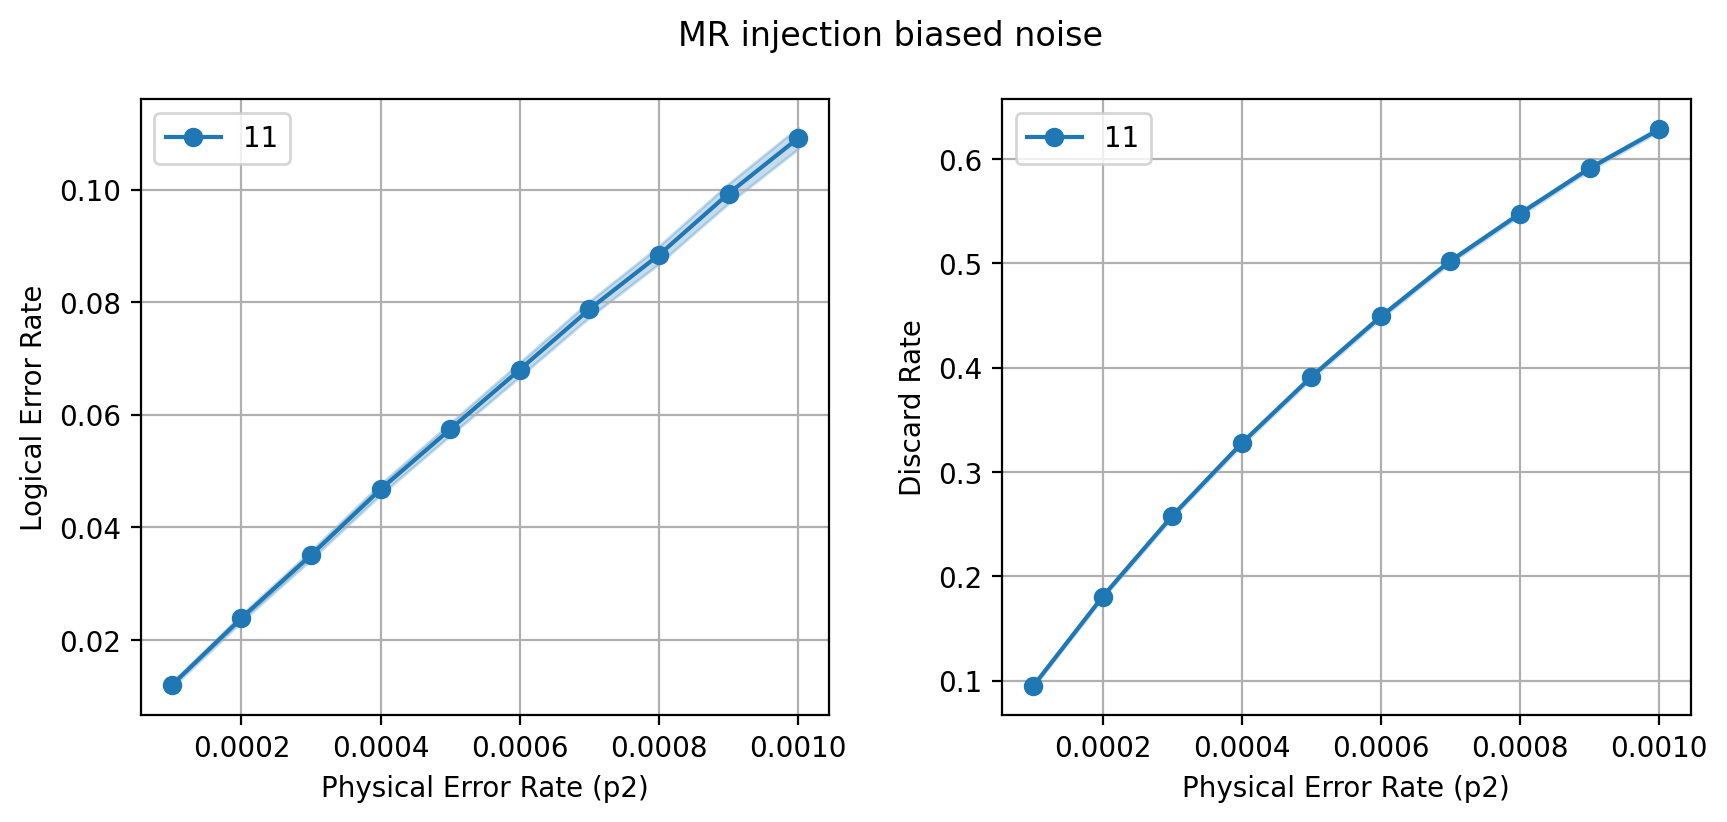

In [127]:
init_d = 11
target_d = 23
circuit = write_inject_grow_code(init_d=init_d, target_d=target_d, start='bell')
bitmask_det = bitmask_for_postselection_circ(stim.Circuit(circuit), init_d=init_d)
growing.append(plot_LER_post_v2(circuit = circuit, dist=init_d, errs=linspace(0.1,1,10)*1e-3, filename='stats.csv', noise_type='biased',
                             bit_packed_array_for_this_circ_dets = bitmask_det))

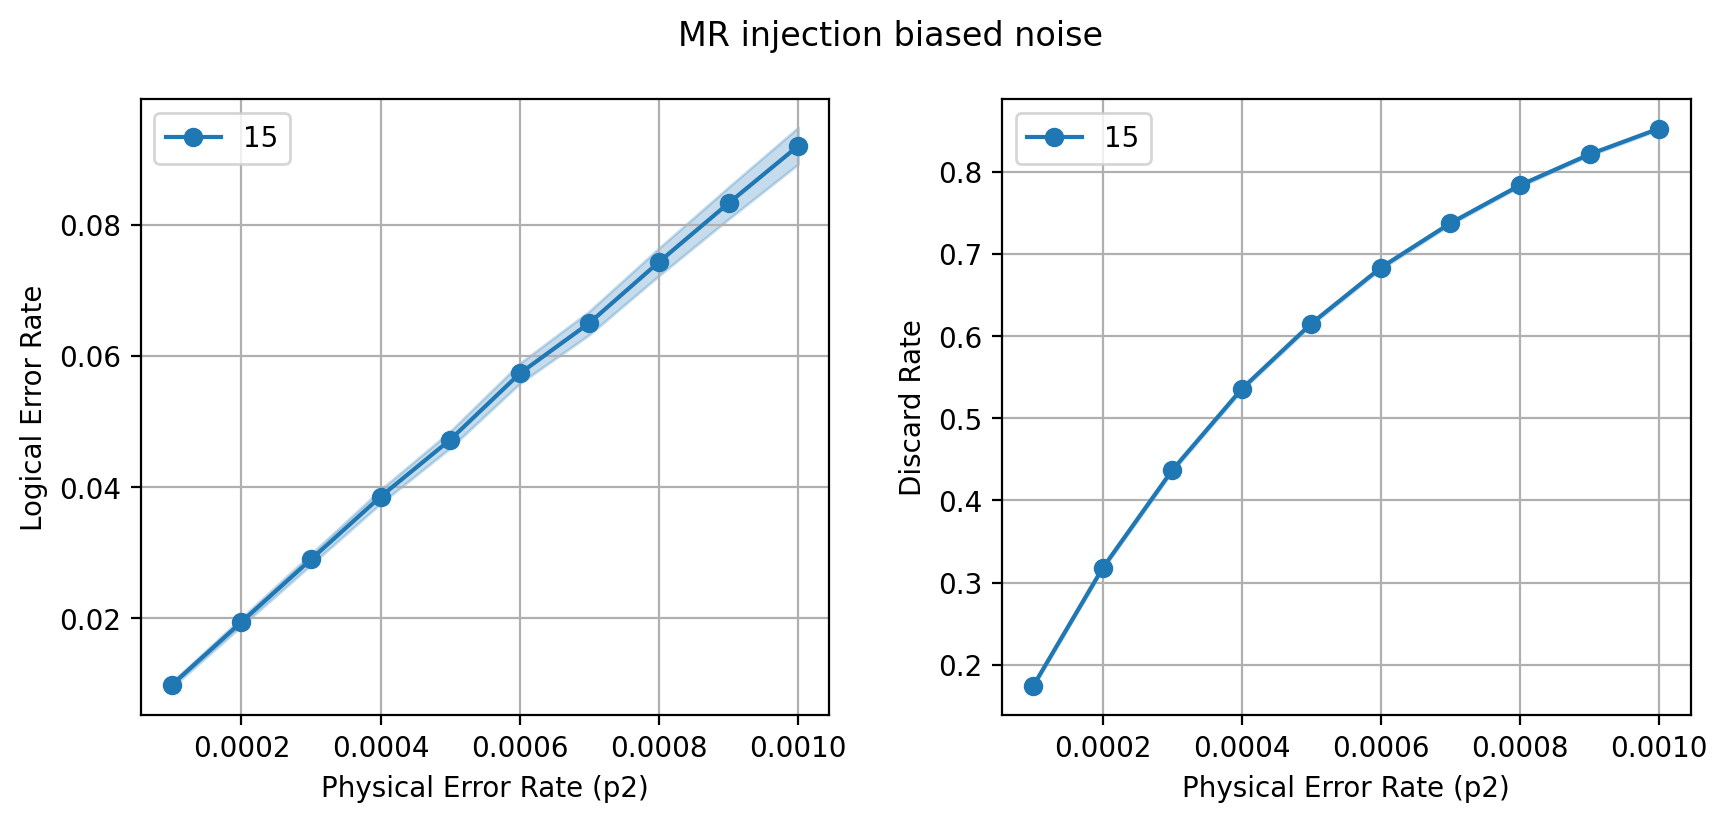

In [128]:
init_d = 15
target_d = 23 
circuit = write_inject_grow_code(init_d=init_d, target_d=target_d, start='bell')
bitmask_det = bitmask_for_postselection_circ(stim.Circuit(circuit), init_d=init_d)
growing.append(plot_LER_post_v2(circuit = circuit, dist=init_d, errs=linspace(0.1,1,10)*1e-3, filename='stats.csv', noise_type='biased',
                             bit_packed_array_for_this_circ_dets = bitmask_det))

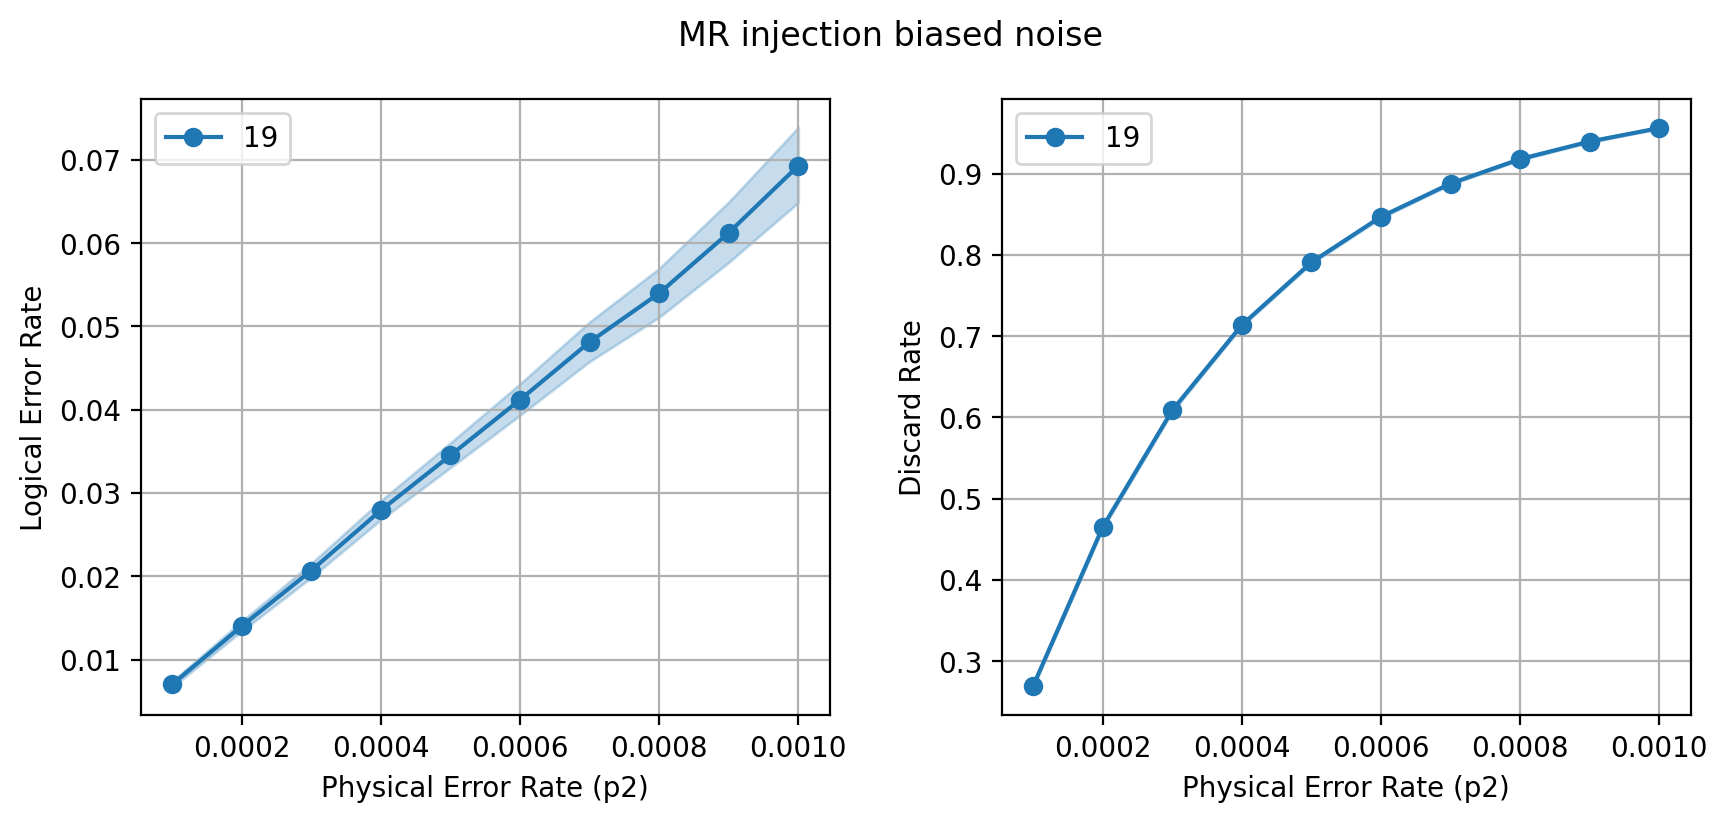

In [129]:
init_d = 19
target_d = 23
circuit = write_inject_grow_code(init_d=init_d, target_d=target_d, start='bell')
bitmask_det = bitmask_for_postselection_circ(stim.Circuit(circuit), init_d=init_d)
growing.append(plot_LER_post_v2(circuit = circuit, dist=init_d, errs=linspace(0.1,1,10)*1e-3, filename='stats.csv', noise_type='biased',
                             bit_packed_array_for_this_circ_dets = bitmask_det))

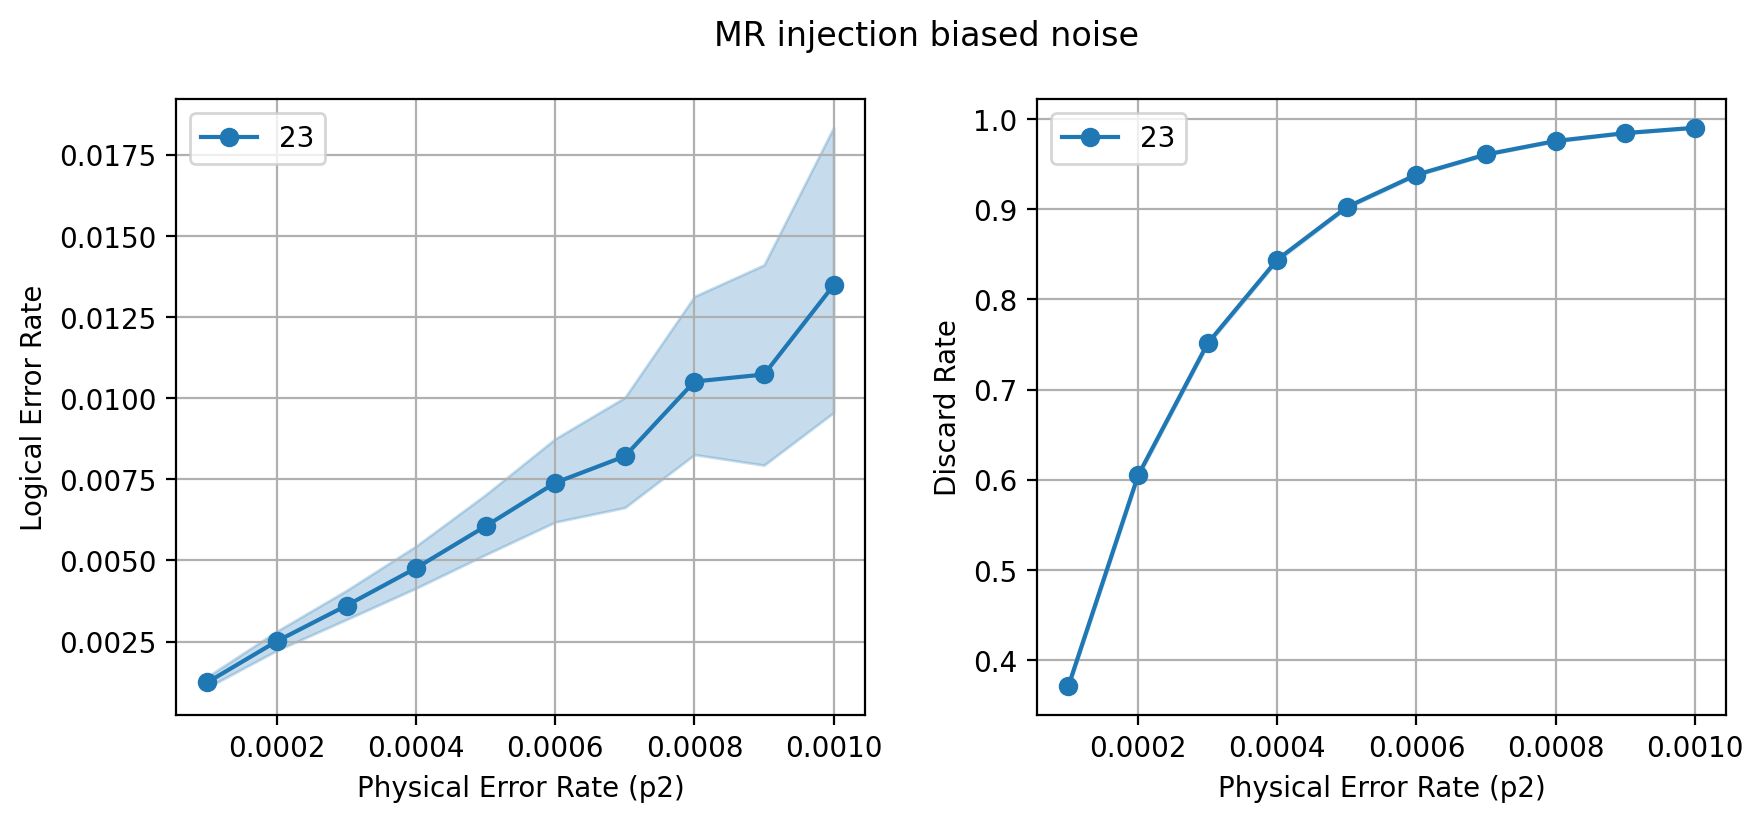

In [130]:
init_d = 23
target_d = 23
circuit = write_inject_grow_code(init_d=init_d, target_d=target_d, start='bell')
bitmask_det = bitmask_for_postselection_circ(stim.Circuit(circuit), init_d=init_d)
growing.append(plot_LER_post_v2(circuit = circuit, dist=init_d, errs=linspace(0.1,1,10)*1e-3, filename='stats.csv', noise_type='biased',
                             bit_packed_array_for_this_circ_dets = bitmask_det))

In [ ]:
import pickle
with open('growing_list.pkl', 'wb') as file:
    pickle.dump(growing, file, protocol=pickle.HIGHEST_PROTOCOL)